# Song Recommendation System

![i](https://i.hizliresim.com/tu7xroe.JPG)

## Team Members
- Beyza Kopuz, kopuz20@itu.edu.tr, 090200354
- Melike Zembilören, zembiloren18@itu.edu.tr, 090180332

## Data Set Introduction

---

Spotify is a platform that offers personalized music experience and hosts many songs. As a spotify user, we used Beyza's playlist and created a dataframe of the songs in this playlist. This dataset consist of many features such as danceability, acousticness, loudness. We analyzed this dataset and built a song recommendation system.

Our dataset is a personal dataset. It contains 100 different track in playlist and their features such as danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration in milliseconds and time singature.

### Columns:

- **danceability (number [float]):** It represents the suitability of track for dancing based on a combination of musical elements such as tempo, rhythm stability and beat strength. <br>
<br>
- **energy (number [float]):** It is a perceptual measure of activity and intensity. Typically, energetic tracks feel fast, loud, and noisy.<br>
<br>
- **loudness (number [float]):** It describes the overall loudness of a track in decibels (dB). The loudness levels are averaged over the entire track.<br>
<br>
- **speechiness (number [float]):** It detects the presence of spoken words in a track.<br>
<br>
- **acousticness (number [float]):** A confidence measure from 0.0 to 1.0 indicating if the track is acoustic.<br>
<br>
- **instrumentalness (number [float]):** Estimates whether or not a music has no vocals. The closer the instrumentalness value is near 1.0, the more likely the track has no vocal contect.<br>
<br>
- **liveness (number [float]):** Detects the presence of an audience in the recording.<br>
<br>
- **valence (number [float]):** A measure that describing the musical positiveness conveyed by a track from 0.0 to 1.0.<br>
<br>
- **tempo (number [float]):** A track's estimated tempo in beats per minute (BPM).<br>
<br>
- **duration_ms (integer):** The track's duration in milliseconds.<br>
<br>
- **time_signature (integer):** It is a notational convention that specifies number of beats are in each bar (or measure).<br>

In [77]:
# reading the data
import pandas as pd
my_spotify_data = pd.read_csv('datasets/my_spotify_data.csv')
my_spotify_data = my_spotify_data.set_index('song name')
my_spotify_data

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song name,,,,,,,,,,,
One Way Trigger,0.516,0.942,-4.113,0.0360,0.000182,0.464000,0.1160,0.964,95.996,242293,4
Soma,0.501,0.715,-7.382,0.0301,0.077400,0.006030,0.0653,0.502,148.971,153809,4
Metabolism,0.422,0.850,-5.134,0.0395,0.000042,0.003710,0.1640,0.340,162.004,180680,3
Tap Out,0.737,0.745,-5.944,0.0351,0.017600,0.381000,0.3060,0.629,115.989,222360,4
Happy Ending,0.626,0.831,-7.743,0.0369,0.005710,0.018800,0.3550,0.255,113.999,172160,4
...,...,...,...,...,...,...,...,...,...,...,...
Pretty Visitors,0.244,0.896,-5.576,0.4640,0.061400,0.000028,0.1270,0.142,83.354,220507,4
When It Started,0.708,0.640,-8.381,0.0339,0.257000,0.005760,0.1340,0.921,132.016,174533,4
Mastermind,0.662,0.357,-14.064,0.1540,0.553000,0.001290,0.0837,0.124,125.966,191039,4


## Description of the Problem

---


- **What is a "Recommendation System"?**

Thousands of new contents are released every year, and users find it difficult to discover new tracks that suit their interests. To deal with this problem many platforms such as Youtube, Netflix and Spotify recommends the new contents according to the users preferences. 

In short, recommendation systems are algorithms and techniques used by companies to provide content that users may be interested in in order to maintain the user's application usage.

- **How do recommendation systems work?**

A recommendation system tries to predict the relevant content by analyzing the user's behavior and preferences. 
The algorithms used in this system can be divided into two classes.

***1. Collaborative Filtering:***<br>

The collaborative filtering method is based on the idea that users with similar tastes and profiles will like similar content. Many users' actions are used to suggest new content to a particular user. It does not require the type of content, its features or any information about the content. Briefly, in this filtering method users' feedback about different items is collected and used for recommendations.


![i](https://i.hizliresim.com/nbm1kzw.JPG)

---

***2. Content-Based Filtering***
In the content-based filtering method, it is based on the idea that users will like content that has similar features to the content they have listened to and liked before. It does not require information about other users or their interactions.

![i](https://i.hizliresim.com/so2jd41.JPG)

We used the content-based filtering method in our recommendation system.


---

### DATA EXPLORATION

---


Before applying the method, in this step, we will summarize the main features of the dataset in order to identify any obvious errors in the dataset and to better understand the nature of the data.

### Data Cleaning

In [78]:
## checking if there are the missing values

def display_missing(df):    
    for col in df.columns.tolist():   
        print('missing values of "{}" column: {}'.format(col, df[col].isnull().sum()))   
    print('\n')
    
display_missing(my_spotify_data)

missing values of "danceability" column: 0
missing values of "energy" column: 0
missing values of "loudness" column: 0
missing values of "speechiness" column: 0
missing values of "acousticness" column: 0
missing values of "instrumentalness" column: 0
missing values of "liveness" column: 0
missing values of "valence" column: 0
missing values of "tempo" column: 0
missing values of "duration_ms" column: 0
missing values of "time_signature" column: 0




We checked to see if our data has missing values. There are no missing values in our dataset.

---

In [79]:
# checking to see if this data set has any duplicate rows.
my_spotify_data.drop_duplicates()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song name,,,,,,,,,,,
One Way Trigger,0.516,0.942,-4.113,0.0360,0.000182,0.464000,0.1160,0.964,95.996,242293,4
Soma,0.501,0.715,-7.382,0.0301,0.077400,0.006030,0.0653,0.502,148.971,153809,4
Metabolism,0.422,0.850,-5.134,0.0395,0.000042,0.003710,0.1640,0.340,162.004,180680,3
Tap Out,0.737,0.745,-5.944,0.0351,0.017600,0.381000,0.3060,0.629,115.989,222360,4
Happy Ending,0.626,0.831,-7.743,0.0369,0.005710,0.018800,0.3550,0.255,113.999,172160,4
...,...,...,...,...,...,...,...,...,...,...,...
Pretty Visitors,0.244,0.896,-5.576,0.4640,0.061400,0.000028,0.1270,0.142,83.354,220507,4
When It Started,0.708,0.640,-8.381,0.0339,0.257000,0.005760,0.1340,0.921,132.016,174533,4
Mastermind,0.662,0.357,-14.064,0.1540,0.553000,0.001290,0.0837,0.124,125.966,191039,4


There are no duplicates in this data set.

In [80]:
#checking the dimension

my_spotify_data.shape

(100, 11)

In [81]:
# checking the column names

my_spotify_data.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')

### Statistical Summary of Data

In [82]:
my_spotify_data.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.51887,0.705440,-6.940860,0.060632,0.166258,0.121113,0.159039,0.454157,120.534880,252170.180000,3.970000
std,0.13519,0.219114,2.787369,0.062289,0.275234,0.222591,0.096057,0.227338,25.199022,88025.805415,0.264193
min,0.21600,0.161000,-15.434000,0.025500,0.000009,0.000000,0.039000,0.038200,72.062000,145213.000000,3.000000
25%,0.42825,0.564250,-8.804750,0.033675,0.000505,0.000042,0.096300,0.276750,102.123500,194196.750000,4.000000
50%,0.51550,0.745500,-6.129500,0.040650,0.014000,0.005100,0.124000,0.473500,118.719000,222086.500000,4.000000
75%,0.63725,0.891000,-4.915750,0.063825,0.207750,0.090625,0.201750,0.606750,136.317250,277556.750000,4.000000
max,0.79800,0.994000,-2.293000,0.464000,0.967000,0.857000,0.483000,0.964000,189.286000,588667.000000,5.000000


Looking at the table, we can see that a statistical summary has been created for our dataset.<br>

***Rows of table:***
- **count:** It represents the number of valid (non-null) data points in the column. Missing or empty values are not included in this count.<br>
<br>
- **mean:** It represents the arithmetic average of the data points in the column. It is calculated by dividing the sum of all values by the number of valid data points.<br>
<br>
- **std:** It measures the dispersion or variability of the data points in the column. A higher standard deviation indicates that the data points are further away from the mean.<br>
<br>
- **min:** It represents the smallest value in the column.<br> 
<br> 
- **25%:** It represents the lower quartile of the ordered data. It is the value that leaves 25% of the data points below it. It is also known as the first quartile.<br>
<br>
- **50%:** It represents the middle value of the data points in the column. It is the value that divides the data into two equal halves when ordered. It is also known as median.<br>
<br>
- **75%:** It represents the upper quartile of the ordered data. It is the value that leaves 75% of the data points below it. It is also known as the third quartile.<br>
<br>
- **max:** It represents the largest value in the column.<br>

### DATA VISUALIZATION
---

### Correlation Map

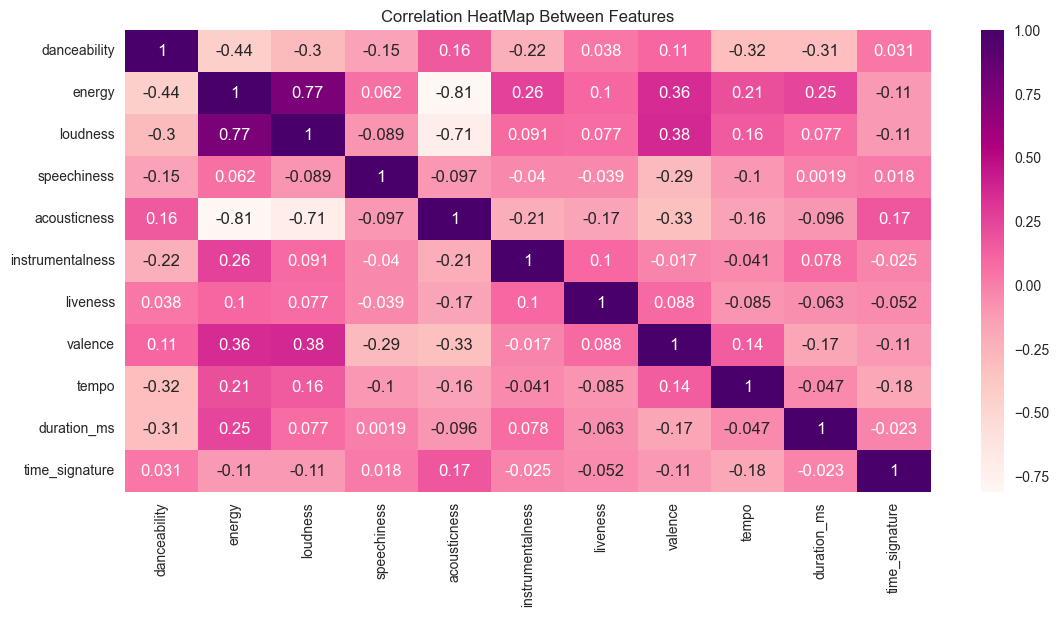

In [83]:
#plotting correlation maps for the features

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = my_spotify_data.corr()
plt.figure(figsize=(13,6))
sns.heatmap(correlation_matrix, annot=True, cmap="RdPu")
plt.title("Correlation HeatMap Between Features")
plt.show()

Here, values above 0.0 indicate variables with a positive correlation, and a value of -1 indicate variables with the least or negative correlation. But considering the heatmap, there is no strong correlation other than "loudness vs energy".

#### Regression Plot Between Loudness and Energy

Text(0, 0.5, 'Loudness')

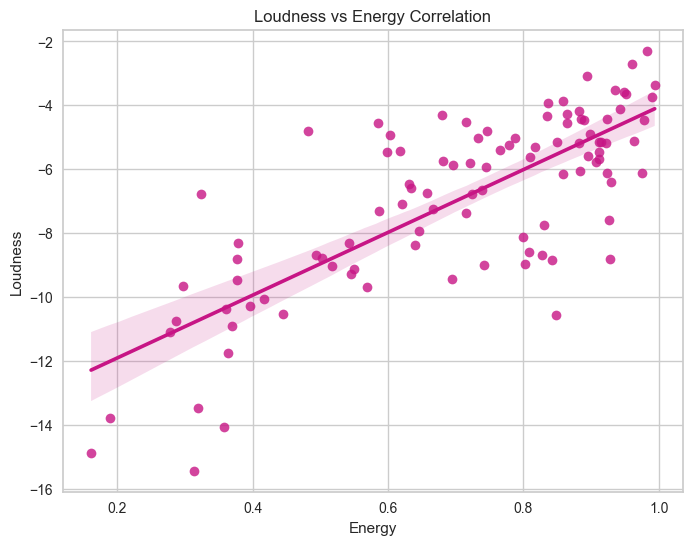

In [84]:
##plotting the loudness vs energy corellation

sns.regplot(x=my_spotify_data['energy'], y=my_spotify_data['loudness'], color = 'mediumvioletred')
plt.title('Loudness vs Energy Correlation') 
plt.xlabel('Energy')  
plt.ylabel('Loudness') 

It can be clearly seen from the graph that there is a significantly positive correlation between loudness and energy.

### Plotting the Distributions of Features

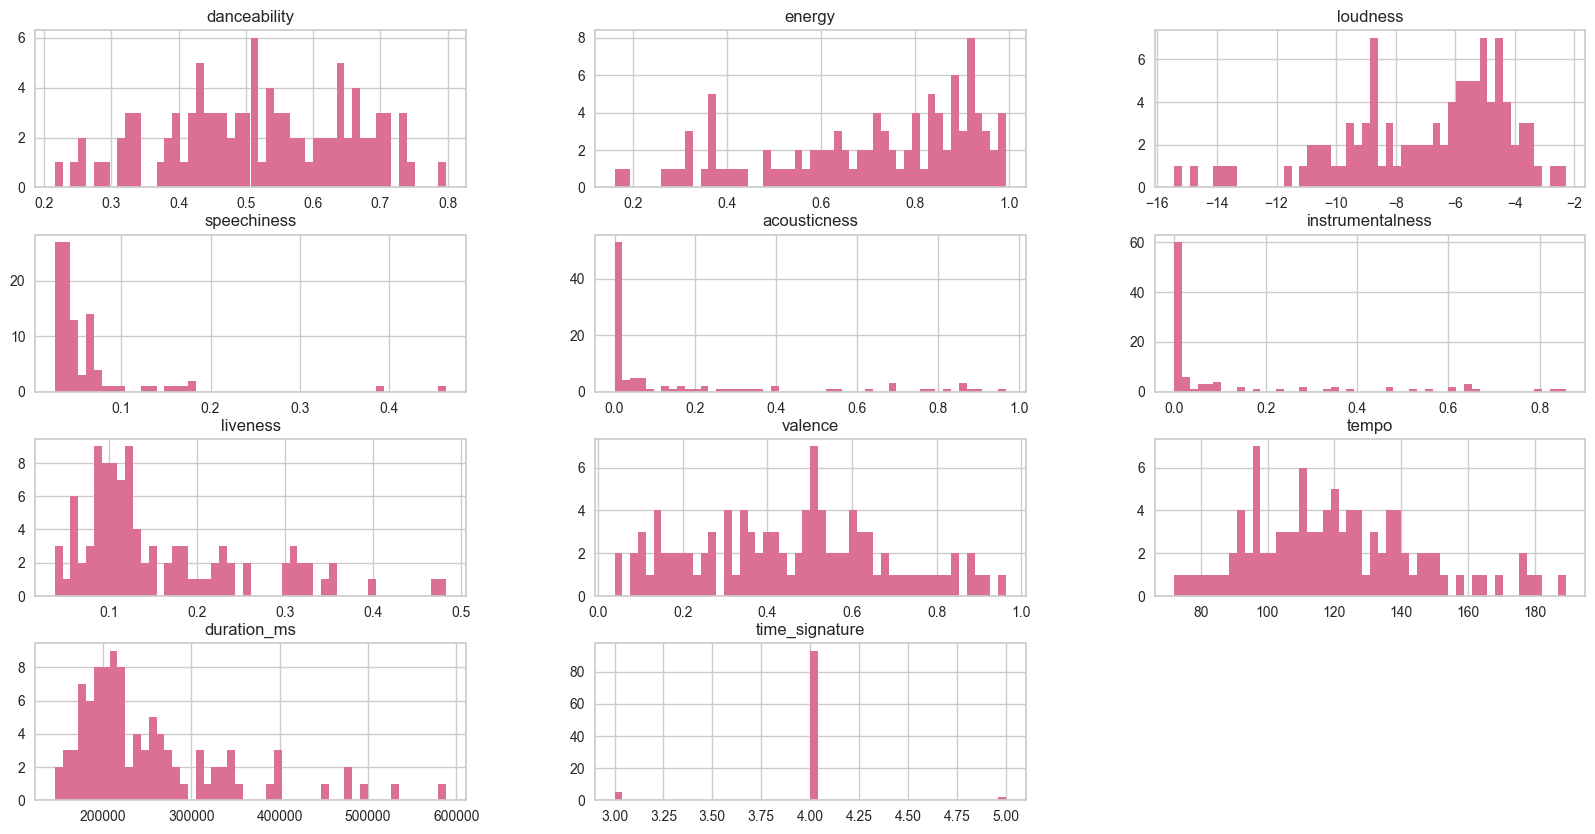

In [85]:
#distributions of features

my_spotify_data[['danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
                 'tempo', 'duration_ms','time_signature']].hist(bins=50, figsize=(20,10), color='palevioletred')
plt.show()

## Methodologies

### Data splitting
We are going to **split** the data before applying any algorithms since it prevents `data leakage`.

In [86]:
from sklearn.model_selection import train_test_split

#Split 90:10, since our dataset is small, it is better to split 90:10
songs_train, songs_test = train_test_split(my_spotify_data, test_size=0.1, random_state=2002)

In [87]:
songs_train.head(5)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song name,,,,,,,,,,,
I Can't Win,0.472,0.746,-4.816,0.0321,0.005810,0.66300,0.0999,0.403,97.440,162040,4
Little Girl (feat. Julian Casablancas),0.540,0.912,-5.678,0.0376,0.000108,0.00298,0.1340,0.839,146.033,272933,4
"Damage, Inc.",0.326,0.848,-10.567,0.1670,0.000467,0.46600,0.1340,0.143,91.671,332465,4
Holy Ground (Taylor's Version),0.622,0.809,-5.623,0.0638,0.028800,0.00218,0.1090,0.511,156.894,202960,4
Enter Sandman,0.577,0.828,-8.691,0.0298,0.002130,0.01140,0.0581,0.604,123.257,331267,4


In [88]:
songs_train.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.513000,0.713933,-6.946544,0.062124,0.152211,0.130105,0.161226,0.453663,121.539644,251860.566667,3.955556
std,0.131923,0.215500,2.865966,0.065271,0.257284,0.229881,0.095530,0.226643,25.492877,87214.858885,0.255770
min,0.216000,0.161000,-15.434000,0.025500,0.000009,0.000000,0.039000,0.038200,72.062000,145213.000000,3.000000
25%,0.426750,0.585500,-8.816250,0.033425,0.000480,0.000052,0.097850,0.309500,103.576000,194463.500000,4.000000
50%,0.514000,0.772000,-5.955500,0.040650,0.012750,0.007495,0.124500,0.473500,119.773000,221293.500000,4.000000
75%,0.621250,0.893000,-4.838500,0.063875,0.200750,0.099250,0.207250,0.604750,137.521000,274513.250000,4.000000
max,0.798000,0.994000,-2.293000,0.464000,0.967000,0.857000,0.483000,0.964000,189.286000,588667.000000,5.000000


We are going to put the songs into different clusters. We are going to use the K-Means Clustering Algorithm. K-Means requires standardized data. As we can see from the above table, this data set is not standardized. We can use the StandardScaler() class and its methods to standardize this data.

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
set_config(transform_output="pandas")

scaler = StandardScaler()
songs_train_scaled = scaler.fit_transform(songs_train)

In [90]:
songs_train_scaled.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01
mean,-6.476301e-17,-4.033810e-16,-6.167906e-17,7.463166e-17,4.564250e-17,3.454027e-17,1.986066e-16,-1.091719e-16,3.626729e-16,-1.270589e-16,-6.340607e-16
std,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00
min,-2.263933e+00,-2.580195e+00,-2.978055e+00,-5.642570e-01,-5.948837e-01,-5.691391e-01,-1.286611e+00,-1.843389e+00,-1.951715e+00,-1.229665e+00,-3.756927e+00
25%,-6.574552e-01,-5.993182e-01,-6.560371e-01,-4.421599e-01,-5.930441e-01,-5.689121e-01,-6.671248e-01,-6.396452e-01,-7.086012e-01,-6.617980e-01,1.747408e-01
50%,7.622669e-03,2.709609e-01,3.477349e-01,-3.308475e-01,-5.450855e-01,-5.363527e-01,-3.865927e-01,8.801425e-02,-6.968777e-02,-3.524435e-01,1.747408e-01
75%,8.251539e-01,8.355924e-01,7.396648e-01,2.697005e-02,1.897175e-01,-1.349754e-01,4.844778e-01,6.703636e-01,6.304070e-01,2.611893e-01,1.747408e-01
max,2.172461e+00,1.306896e+00,1.632823e+00,6.191523e+00,3.184626e+00,3.179760e+00,3.387169e+00,2.264337e+00,2.672350e+00,3.883436e+00,4.106409e+00


In [91]:
# transform test data
songs_test_scaled = scaler.transform(songs_test)

### K-means clustering

Clustering is an unsupervised learning algorithm. It is generally used to group data into several homogeneous subgroups or clusters. K-means clustering algorithm is a method that divides data points into k groups based on their similarities. This algorithm is used in many fields such as market segmentation, image segmentation etc.

![i](https://i.hizliresim.com/etnv3bu.jpg)

In K-Means Clustering as the number of clusters increases, inertia decreases. We want the inertia to be low. But if we continue increasing the number of clusters, then each datapoint will become a cluster itself. This won't be useful. So, we are looking for an optimum value for k.

In [92]:
#calculate inertia values for different values of k
from sklearn.cluster import KMeans
inertia = []

K = range(1,11)
for k in K:
    km_k = KMeans(n_clusters=k, init='random', n_init=20, random_state=1773)
    #print(k)
    km_k.fit(songs_train_scaled)
    inertia.append(km_k.inertia_)

inertia

[990.0,
 774.4021298868387,
 678.2545761087545,
 603.3524076759437,
 551.7844315526831,
 520.3860908040139,
 464.7111263984186,
 418.2319344193983,
 407.11954805406117,
 397.76486733417556]

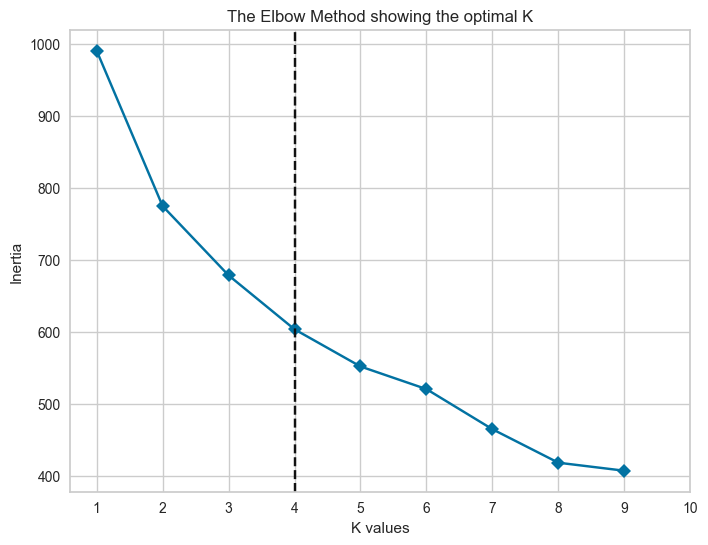

In [93]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]

fig, ax = plt.subplots()

model = KMeans(n_clusters=k, init='random', n_init=20, random_state=1773)

visualizer = KElbowVisualizer(model, k=(1,10), timings=False, ax=ax)
visualizer.fit(songs_train_scaled) # Fit the data to the visualizer
visualizer.ax.set_ylabel('Inertia')
visualizer.ax.set_xlabel('K values')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
visualizer.ax.set_title('The Elbow Method showing the optimal K');     

In [94]:
km4 = KMeans(n_clusters=4, init='random', n_init=20, random_state=2000)
km4.fit(songs_train_scaled)

KMeans(init='random', n_clusters=4, n_init=20, random_state=2000)

In [95]:
#get the cluster labels
label_pred = km4.predict(songs_train_scaled)
label_pred

array([2, 2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 3, 1, 0, 2, 2, 0,
       1, 1, 0, 2, 2, 0, 2, 1, 2, 2, 1, 0, 2, 1, 2, 1, 3, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 3, 2, 2, 2, 1, 3, 0, 1,
       1, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1,
       1, 2])

In [96]:
#count the number of elements in each cluster
pd.Series(km4.labels_).value_counts()

2    43
1    22
0    20
3     5
dtype: int64

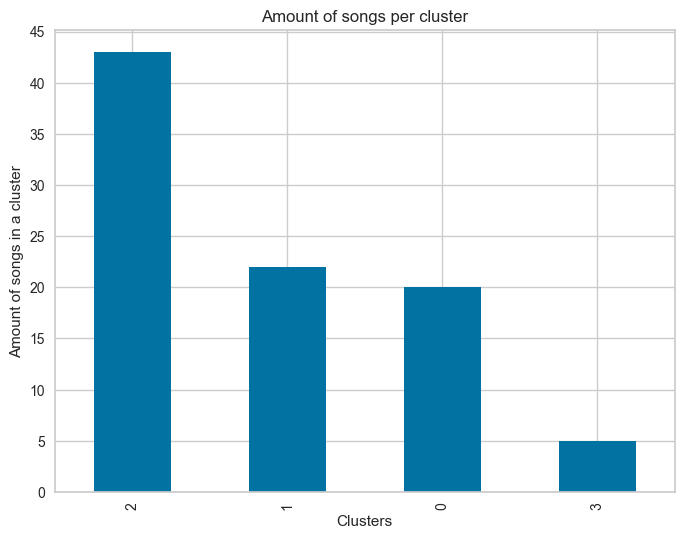

In [97]:
songs_train_scaled['cluster'] = label_pred

songs_train_scaled['cluster'].value_counts().plot(kind='bar')
plt.yticks([0,5,10,15,20,25,30,35,40,45])
plt.xlabel('Clusters')
plt.ylabel('Amount of songs in a cluster')
plt.title('Amount of songs per cluster')
plt.show()

Above graph shows the number of the songs in eachg cluster. As we can see, third cluster (2) has the most songs with 43 songs.

In [98]:
cl1 = songs_train_scaled.loc[songs_train_scaled['cluster'] == 0]
cl1

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
song name,,,,,,,,,,,,
Snow On The Beach (feat. Lana Del Rey),1.143400,-1.842907,-2.292792,-0.379378,2.101964,-0.564795,-0.465542,-1.156550,-0.456894,0.049158,0.174741,0
This Love (Taylor’s Version),-0.327775,-1.026292,-0.605423,-0.419435,0.585456,-0.569139,-0.989763,-1.780384,0.887519,-0.020300,0.174741,0
Lavender Haze,1.692232,-1.259610,-1.253493,0.096685,0.202420,-0.563890,0.092364,-1.576285,-0.966502,-0.570335,0.174741,0
ivy,0.015245,-0.788306,-0.817704,-0.413273,2.746871,-0.569053,-0.727652,0.360887,-1.289252,0.098922,0.174741,0
cowboy like me,0.693663,-0.918965,-0.725423,-0.422517,2.406829,-0.568461,-0.402383,0.254400,0.253536,0.267263,0.174741,0
Bir Daha,1.318722,-1.996898,-1.334195,-0.487224,1.511777,-0.182001,-0.276064,-1.422766,-0.061483,0.392019,0.174741,0
Mastermind,1.135778,-1.665585,-2.497353,1.415487,1.566496,-0.563496,-0.816075,-1.462699,0.174604,-0.701283,0.174741,0
Maroon,1.105287,-1.567591,-0.474897,-0.373216,-0.363144,-0.569139,-0.669756,-1.843389,-0.532749,-0.387293,0.174741,0
Sweet Nothing,-1.364458,-2.580195,-2.781914,-0.177552,3.184626,-0.568933,-0.486595,-0.255849,2.177732,-0.730593,0.174741,0


In [99]:
cl2 = songs_train_scaled.loc[songs_train_scaled['cluster'] == 1]
cl2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
song name,,,,,,,,,,,,
"Damage, Inc.",-1.425439,0.625605,-1.270335,1.615772,-0.593094,1.469352,-0.286591,-1.378397,-1.178211,0.929383,0.174741,1
The Call Of Ktulu - Remastered,-1.547402,0.989583,-0.222265,0.574288,-0.506586,3.179760,0.513426,-1.311843,0.689222,3.247270,0.174741,1
The Day That Never Comes,-1.364458,1.250900,1.632823,-0.003458,-0.594563,0.082653,-0.581334,0.210030,0.210776,2.587445,0.174741,1
Dangerous Animals,-1.318722,0.970917,0.616682,1.816058,-0.544499,-0.569129,0.681850,0.347576,0.150818,-0.474969,0.174741,1
What If You Were Right The First Time?,-1.943781,1.232234,0.871068,1.184388,-0.594733,-0.473339,-1.219241,-0.384521,0.959587,-0.794897,0.174741,1
Battery,-0.243925,0.998916,-0.649984,0.078197,-0.594059,1.871801,-0.581334,-0.118304,-0.979874,0.697569,0.174741,1
Confusion,-0.503096,1.288231,1.120893,0.027355,-0.594804,-0.418658,-0.381329,-0.459949,0.029520,1.722209,0.174741,1
Ode To The Mets,-0.663172,-0.452327,0.534577,-0.511875,0.737888,0.222635,-0.633966,-1.121054,-1.165154,1.152169,0.174741,1
Pretty Visitors,-2.050498,0.849592,0.480893,6.191523,-0.354936,-0.569015,-0.360276,-1.382834,-1.506286,-0.361512,0.174741,1


In [100]:
cl3 = songs_train_scaled.loc[songs_train_scaled['cluster'] == 2]
cl3

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
song name,,,,,,,,,,,,
I Can't Win,-0.312529,0.149635,0.747560,-0.462574,-0.572211,2.331118,-0.645545,-0.224791,-0.950644,-1.035647,0.174741,2
Little Girl (feat. Julian Casablancas),0.205812,0.924254,0.445103,-0.377838,-0.594497,-0.556103,-0.286591,1.709719,0.966175,0.242969,0.174741,2
Holy Ground (Taylor's Version),0.830871,0.443617,0.464402,0.025815,-0.482354,-0.559603,-0.549754,0.254400,1.394602,-0.563832,0.174741,2
Enter Sandman,0.487851,0.532278,-0.612090,-0.498009,-0.586594,-0.519270,-1.085554,0.667036,0.067743,0.915570,0.174741,2
She's Thunderstorms,-0.060981,0.858924,0.715981,-0.450248,-0.592895,-0.558815,0.123944,1.230528,-0.102981,-0.195328,0.174741,2
Life Is Simple in the Moonlight,0.015245,-0.083684,0.382296,-0.474899,-0.545672,-0.567630,-0.732916,0.263274,0.526742,0.038965,0.174741,2
Razorblade,-0.907098,0.676936,1.086156,-0.326996,-0.587063,0.450107,-0.644493,0.254400,0.573367,-0.504186,4.106409,2
Selfless,0.190567,-0.163012,0.929665,-0.444086,0.151609,-0.561484,-0.761337,-1.618879,0.017765,-0.343225,0.174741,2
Cornerstone,-1.722723,0.032976,0.398788,-0.360890,-0.565058,-0.569139,1.755556,1.372511,1.882081,-0.621333,0.174741,2


In [101]:
cl4 = songs_train_scaled.loc[songs_train_scaled['cluster'] == 3]
cl4

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
song name,,,,,,,,,,,,
I Bet You Think About Me (feat. Chris Stapleton) (Taylor’s Version) (From The Vault),-0.929966,0.004977,0.852823,-0.194499,0.057805,-0.569139,0.229209,0.085796,1.109010,0.383337,-3.756927,3
American Sports,-1.074796,0.704934,0.932823,-0.166768,-0.588314,-0.556322,-0.360276,0.622666,2.175444,-1.081767,-3.756927,3
Red Light,0.160076,0.574275,1.055630,-0.330077,-0.594266,2.269876,0.292369,1.993683,-0.710297,-0.693742,-3.756927,3
Metabolism,-0.693663,0.634938,0.635981,-0.348565,-0.594757,-0.552910,0.029205,-0.504318,1.596173,-0.820724,-3.756927,3
One,-0.579323,-0.088350,-0.877353,-0.006539,-0.590581,-0.194249,-0.391856,-0.180421,-0.763747,2.255064,-3.756927,3


In [102]:
cl1_mean = cl1.groupby('cluster').mean()
cl2_mean = cl2.groupby('cluster').mean()
cl3_mean = cl3.groupby('cluster').mean()
cl4_mean = cl4.groupby('cluster').mean()

In [103]:
frames = [cl1_mean, cl2_mean, cl3_mean, cl4_mean]
cluster_means = pd.concat(frames)
cluster_means

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,
0,0.660123,-1.567125,-1.318809,0.129270,1.540172,-0.468161,-0.302065,-0.882790,-0.332649,-0.270172,0.174741
1,-0.924075,0.830078,0.420989,0.578630,-0.491846,0.525610,-0.130320,-0.486974,0.000699,1.085545,0.174741
2,0.238253,0.261628,0.337547,-0.331833,-0.410994,-0.060406,0.211853,0.612833,0.075140,-0.430714,0.266175
3,-0.623534,0.366155,0.519981,-0.209290,-0.462023,0.079451,-0.040270,0.403481,0.681317,0.008434,-3.756927


We can use the SilhouetteVisualizer to evaluate our clustering method.

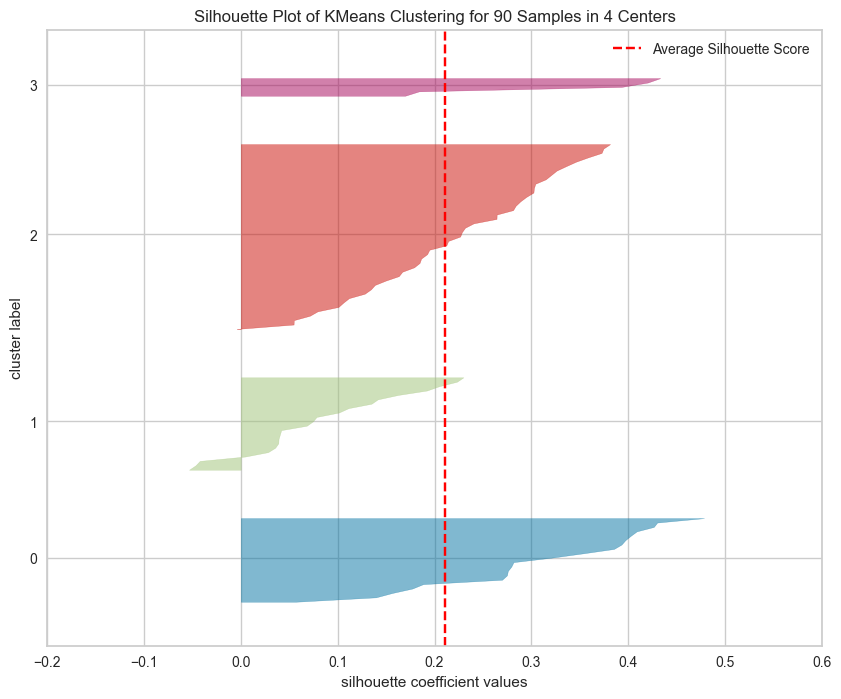

In [107]:
# Import SilhouetteVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

fig, ax = plt.subplots()

visualizer = SilhouetteVisualizer(km4, colors='yellowbrick', ax=ax)
visualizer.fit(songs_train_scaled.drop(['cluster'], axis=1))  
#visualizer.ax.set_ylabel('Cluster Label')
#visualizer.ax.set_title('Silhoutte Coefficient Values');
visualizer.show();      

* In this graph x axis shows the silhouette values, and the y axis shows the cluster labels. and the 

* Height of each silhouette indicates the number of points in the corresponding cluster.

* The red line shows the average silhouette value for all clusters. In this example, the average value is between 0.2 and 0.3 but much closer to 0.2.

* Data points with a large (almost 1) silhouette values are very well clustered, while data points with a negative silhouette values are probably placed in the wrong cluster.

* If the average silhouette value is close to 1, that means the separation of the clusters are well-done. In our case, average silhouette value is closer to 0.2. This model can be improved by using different clustering algorithms and the silhouette value would ideally be close to 1.

### PCA for visualization only

In [108]:
#instantiate the pca object
from sklearn.decomposition import PCA

#instantiate the pca class
pca = PCA(n_components=2)
songs_pca = pca.fit_transform(songs_train_scaled)

In [109]:
songs_pca

,pca0,pca1
song name,,
I Can't Win,-0.975592,0.207633
Little Girl (feat. Julian Casablancas),-1.658445,-1.022974
"Damage, Inc.",0.251225,3.102889
Holy Ground (Taylor's Version),-0.784488,-0.914641
Enter Sandman,-0.457411,-0.381965
...,...,...
Taken for a Fool,-1.769908,-1.557908
mirrorball,3.101909,-0.282821
All The Time,-0.716630,1.792563


In [110]:
km4_pca = KMeans(n_clusters=4, init='random', n_init=20, random_state=1773)
km4_pca.fit(songs_pca)

KMeans(init='random', n_clusters=4, n_init=20, random_state=1773)

In [111]:
label_pca = km4_pca.predict(songs_pca)

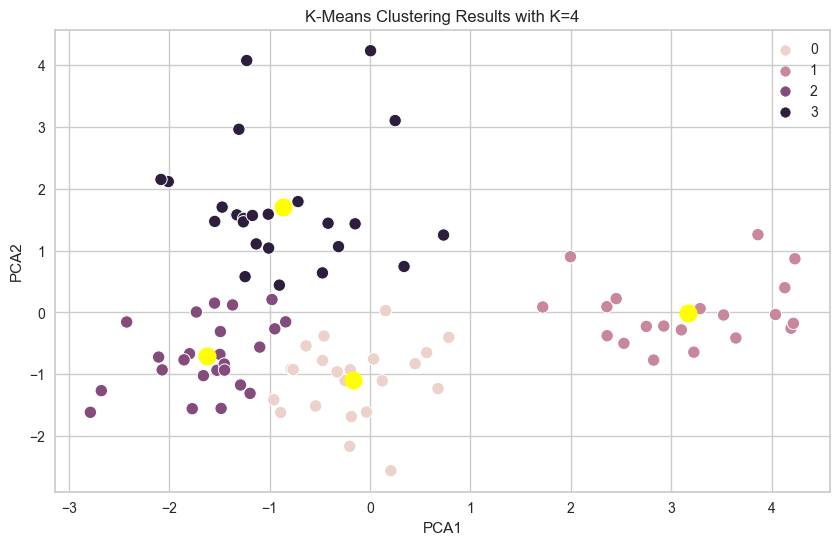

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]

sns.scatterplot(data=songs_pca, x=songs_pca.pca0, y=songs_pca.pca1, hue=label_pca, s=80)
plt.scatter(km4_pca.cluster_centers_[:,0], km4_pca.cluster_centers_[:,1], marker='o', s=100, c='yellow', linewidth=3)
plt.title('K-Means Clustering Results with K=4')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show();

Above is a graph that visualizes the clusters. There are 4 different clusters here.

### Song Recommendation

In [114]:
songs_test_scaled

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song name,,,,,,,,,,,
tolerate it,-1.501666,-1.646920,-1.205072,-0.205284,2.836767,-0.569022,-0.858181,-1.032315,-1.837715,-0.074030,4.106409
Anti-Hero,0.952834,-0.372999,0.127910,-0.253044,-0.075085,-0.569134,-0.097113,0.289895,-0.969855,-0.590005,0.174741
Teddy Picker,0.945211,1.162239,0.642296,0.401735,-0.593801,-0.565250,-1.224505,1.638727,1.126603,-1.001517,0.174741
Knee Socks,1.158646,-0.802306,-0.482967,-0.448708,-0.114170,-0.556409,1.902928,0.591608,-0.929540,0.065750,0.174741
Why'd You Only Call Me When You're High?,1.356835,-0.386998,0.164402,-0.390163,-0.406137,-0.569090,-0.602387,1.536678,-1.165075,-1.046208,0.174741
For Whom The Bell Tolls - Remastered,0.038113,0.672269,0.280542,0.078197,-0.572914,-0.553872,-1.067659,-0.908080,-0.143689,0.670046,0.174741
Tap Out,1.707478,0.144969,0.351770,-0.416354,-0.526129,1.097524,1.523973,0.777960,-0.218953,-0.340147,0.174741
Halo On Fire,-1.448307,1.036247,1.204402,-0.180633,-0.594863,-0.550023,-0.662388,-1.081121,0.190422,2.803635,0.174741
At The Door,-0.434492,-1.824242,0.064051,-0.467196,2.758597,-0.529200,-0.160272,-0.402268,-0.182899,0.674658,0.174741


In [115]:
import random 
from sklearn.metrics.pairwise import euclidean_distances
def get_recommendation(song_name):
        features = songs_test_scaled.loc[song_name]
        song_features = pd.DataFrame(features).transpose()
        ed1 = euclidean_distances(song_features, cl1_mean)
        ed2 = euclidean_distances(song_features, cl2_mean)
        ed3 = euclidean_distances(song_features, cl3_mean)
        ed4 = euclidean_distances(song_features, cl4_mean)
        c = min(ed1, ed2, ed3, ed4)
        if c == ed1:
            cl1_list = cl1.index.values.tolist()
            print(random.choices(cl1_list, k = 5))
        elif c == ed2:
            cl2_list = cl2.index.values.tolist()
            print(random.choices(cl2_list, k = 5))
        elif c == ed3:
            cl3_list = cl3.index.values.tolist()
            print(random.choices(cl3_list, k = 5))
        else:
            cl4_list = cl4.index.values.tolist()
            print(random.choices(cl4_list, k = 5))
            

#### Getting the song recommendations:

In [116]:
get_recommendation('tolerate it')

['Bir Daha', 'Labyrinth', 'Carolina - From The Motion Picture “Where The Crawdads Sing”', 'Telescope', 'Telescope']


In [117]:
get_recommendation('Anti-Hero')

['Slow Animals', 'My Propeller', 'Take It Or Leave It', 'Soma', 'Harvester Of Sorrow']


In [118]:
get_recommendation('Teddy Picker')

['Gratisfaction', "Don't Sit Down 'Cause I've Moved Your Chair", '50/50', 'Razorblade', 'Bejeweled']


## Results
- We've built a song recommendation system with K-Means Clustering Algorithm. We've got our system to work and recommend 5 songs successfully according to the user's inputted song. 

## Conclusion

- In this project, we wanted to build a song recommendation system. 
- To start off, we did literature review for our project topic. 
- We then collected the data from Beyza's Spotify account using the Spotify API. 
- We performed some data exploration and data visualization. 
- Then, we prepared the data before using it for the methodology. 
- We splitted the data set into 4 different clusters by using the K-Means Clustering Algorithm with k=4. 
- We performed PCA to be able to visualize our clusters in plane. 
- We defined a function that calculates the Euclidian Distance between a (user-input) song and the cluster means for each cluster and that finds the closest cluster for that song. 
- Then we recommended 5 random songs from that cluster.

## Work Distribution

- Task 1: Literature Review - Beyza %20 & Melike %80

- Task 2: Data Manipulation - Beyza %100

- Task 3: Doing researches on the methodologies - Beyza %50 & Melike %50

- Task 4: Exploratory Data Analysis - Melike %100

- Task 5: Model Construction - Beyza %100

- Task 6: Conclusion on the result - Beyza %50 & Melike %50

- Task 7: Presentation - Beyza %50 & Melike %50

## References
- https://developer.spotify.com/documentation/web-api/reference/get-audio-features
- https://developer.spotify.com/documentation/web-api
- https://www.linkedin.com/advice/0/how-do-you-choose-between-collaborative-content-based
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html
- https://seaborn.pydata.org/generated/seaborn.heatmap.html
- https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html